# Geodatenanalyse 1


## Tag 4 / Block 1 - Lösung zur Übung 11

## Geodatenanalyse mit *GeoPandas*

In [2]:
import geopandas as geopd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
import shapely as shp

## Übung 1

Die Datei *data/Messstellen_Karlsruhe.xlsx* enthält eine Liste von Grundwassermessstellen im Stadtgebiet von Karlsruhe. Die Koordinaten für diese Messstellen sind in DHDN (3-degree Gauss-Kruger Zone 3) angegeben.

**Aufgabe 1**: Transformiere die Koordinaten der Messstellen ins WGS84 Koordinatensystem und speichere die Ergebnisse als Shape-Datei.

**Aufgabe 2**: Erstelle eine Karte dieser Messstellen, auf der im Hintergrund das Stadtgebiet ersichtlich ist.

In [11]:
# Aufgabe 1

# Daten einlesen
df = pd.read_excel('data/Messstellen_Karlsruhe.xlsx')

# erstelle die benötigten Geometrien
geometry = []
for index, row in df.iterrows():
    geometry.append(shp.geometry.Point(row.Rechtswert, row.Hochwert))

# speichere im geopandas-Format
gdf = geopd.GeoDataFrame(df, crs="EPSG:31467", geometry=geometry)

# Projektion ins WGS84
wgs = gdf.to_crs('epsg:4326')

# speichere als Shape-Datei
wgs.to_file('data/Messstellen_Karlsruhe.shp')

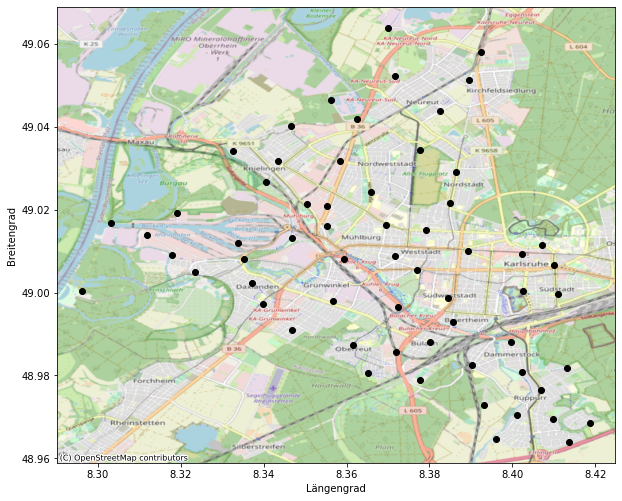

In [12]:
# Aufgabe 2

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

monitoring = geopd.read_file("data/Messstellen_Karlsruhe.shp")

monitoring.plot(ax=ax, marker='o', c='k')

ctx.add_basemap(ax, crs=monitoring.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_xlabel('Längengrad')
ax.set_ylabel('Breitengrad')

plt.show()

## Übung 2

Der in der Vorlesung bereits verwendete Datensatz zu Gemeinden in Baden-Württemberg (*data/Gebiete/AX_KommunalesGebiet.shp*) soll hier weiter untersucht werden.

**Aufgabe 1**: Bestimme die drei Gemeinden, welche die Größte Fläche aufweisen.

**Aufgabe 2**: Bestimme die drei Gemeinden, welche die Größte Gemeindengrenzen aufweisen.

**Aufgabe 3**: Finde alle Gemeinden, welche an die Gemeinde Stuttgart angrenzen.

In [35]:
# Aufgabe 1

# lade die Datei
gemeinden = geopd.read_file("data/Gebiete/AX_KommunalesGebiet.shp")

# sortiere nach Indices
idx = np.argsort(gemeinden['geometry'].area.values)

# Namen anzeigen ...
gemeinden.iloc[idx[-3:]].Name

147    Bad Wurzach
469    Baiersbronn
640      Stuttgart
Name: Name, dtype: object

In [36]:
# Aufgabe 2

idx = np.argsort(gemeinden.geometry.length.values)

# Namen anzeigen ...
gemeinden.loc[idx[-3:]].Name

193    Villingen-Schwenningen
421           Ehingen (Donau)
567                      Bühl
Name: Name, dtype: object

In [40]:
# Aufgabe 3

# welche ID hat Stuttgart?
id = np.where(gemeinden.Name.values == 'Stuttgart')

# neues Polygon mit Puffer um Stuttgart herum
stuttgart = gemeinden.loc[id].geometry.buffer(10)

# suche überlappende Polygone
for i, row in gemeinden.iterrows():
    if (stuttgart.overlaps(row.geometry).values):
        print(row.Name)

Leonberg
Sindelfingen
Neuhausen auf den Fildern
Leinfelden-Echterdingen
Filderstadt
Esslingen am Neckar
Ostfildern
Ditzingen
Fellbach
Kernen im Remstal
Möglingen
Korntal-Münchingen
Kornwestheim
Remseck am Neckar
Gerlingen


## ENDE